In [1]:
from arcgis.gis import GIS
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
%matplotlib inline

## Visualizing and Add content 

In [2]:
gis = GIS("https://tiger.maps.arcgis.com/", "bputra_tiger", "Bonaparte15!")

<Item title:"poi_sampling_jaksel" type:Feature Layer Collection owner:bputra_tiger>
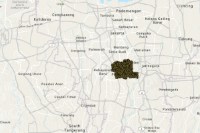

In [3]:
pop_density = gis.content.get('c9a226fb299447bd9d5112cc69d191f6')
pop_density

In [4]:
map1 = gis.map("Mampang Prapatan, IDN")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [5]:
# Cek list basemap

#map1.basemaps

In [6]:
#map1.basemap = 'arcgis-imagery'

In [8]:
map1.add_layer(pop_density)
#map1.add_layer(pop_density, {"renderer" : "ClassedSizeRenderer", "field_name" : "tags"})

## Spatially Enabled DataFrame - SEDF Map Visualization

In [39]:
sedf = pd.DataFrame.spatial.from_featureclass(r'C:\Users\bputra\OneDrive - ESRI Indonesia\PT ESRI Indonesia\Research\code-script\22_arcgis_for_python_study\belajar_arcgis_for_python\belajar_arcgis_for_python.gdb\poi_sampling_jaksel')
sedf.info()
sedf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OBJECTID      8081 non-null   Int64         
 1   poi_name      8081 non-null   string        
 2   address       7440 non-null   string        
 3   tags          8081 non-null   string        
 4   source        8077 non-null   string        
 5   createdon     8081 non-null   datetime64[us]
 6   modifiedon    0 non-null      datetime64[us]
 7   geohash_id    8081 non-null   string        
 8   shape_leng_1  7188 non-null   Float64       
 9   province      8081 non-null   string        
 10  city          8081 non-null   string        
 11  district      8081 non-null   string        
 12  subdistrict   8081 non-null   string        
 13  join_count    880 non-null    Int32         
 14  target_fid    880 non-null    Int32         
 15  shape_leng    880 non-null    Float64 

,OBJECTID,poi_name,address,tags,source,createdon,modifiedon,geohash_id,shape_leng_1,province,city,district,subdistrict,join_count,target_fid,shape_leng,SHAPE
0,1,Masjid UMAR IBNU ABDUL AZIZ,"Jl. Menteng Pulo II, GG. R.R., RT 005/012, Men...",Government and Public;Communal;Religion;Mosque,Website Simas Kemenag,2023-09-26 15:00:00,NaT,qqgux5r,0.066142,DKI Jakarta,Kota Administrasi Jakarta Selatan,Tebet,Menteng Dalam,<NA>,<NA>,<NA>,"{""x"": 11893465.1329, ""y"": -694012.4778000005, ..."
1,2,Masjid AL-ISTIQOMAH,Komplek Brimob Rt.002 Rw.14 Menteng Dalam,Government and Public;Communal;Religion;Mosque,Website Simas Kemenag,2023-09-26 15:00:00,NaT,qqgux70,0.066142,DKI Jakarta,Kota Administrasi Jakarta Selatan,Tebet,Menteng Dalam,<NA>,<NA>,<NA>,"{""x"": 11893678.0759, ""y"": -694061.3568000011, ..."
2,3,Masjid AL-MUNADA DARRUSSALAM BAITURROHMAN,Jl. Menteng Dalam RT 003/RW 05 Kec.Tebet,Government and Public;Communal;Religion;Mosque,Website Simas Kemenag,2023-09-26 15:00:00,NaT,qqgux74,0.066142,DKI Jakarta,Kota Administrasi Jakarta Selatan,Tebet,Menteng Dalam,<NA>,<NA>,<NA>,"{""x"": 11893997.785500001, ""y"": -694099.1224000..."
3,4,Masjid JAM'IATUL IMAN,Jl.Menteng Pulo Rt.001 Rw.12 Kel.Menteng Dalam,Government and Public;Communal;Religion;Mosque,Website Simas Kemenag,2023-09-26 15:00:00,NaT,qqgux4v,0.066142,DKI Jakarta,Kota Administrasi Jakarta Selatan,Tebet,Menteng Dalam,<NA>,<NA>,<NA>,"{""x"": 11893288.1015, ""y"": -694199.2928999998, ..."
4,5,Masjid AR-RIDWAN,Jl. Pal Batu Rt.003 Rw.004,Government and Public;Communal;Religion;Mosque,Website Simas Kemenag,2023-09-26 15:00:00,NaT,qqgux6f,0.066142,DKI Jakarta,Kota Administrasi Jakarta Selatan,Tebet,Menteng Dalam,<NA>,<NA>,<NA>,"{""x"": 11894033.585900001, ""y"": -694278.7201000..."


In [32]:
map2 = gis.map("Jakarta Selatan, IDN")
map2.basemap = 'openstreetmap'
#map2

### Plot the SEDF data on a Map

In [33]:
map2

MapView(layout=Layout(height='400px', width='100%'))

In [34]:
map2.add_layer(sedf)

In [14]:
sedf.spatial.plot(map_widget=map2)

True

### Use the Simple Renderer

In [35]:
map3 = gis.map("Jakarta Selatan, IDN")
map3

MapView(layout=Layout(height='400px', width='100%'))

In [36]:
sedf.spatial.plot(map_widget=map3, renderer_type = 's') # s = simple renderer

True

### Use the Heatmap Renderer

In [37]:
map4 = gis.map("Jakarta Selatan, IDN")
map4

MapView(layout=Layout(height='400px', width='100%'))

In [38]:
sedf.spatial.plot(map_widget=map4, renderer_type = 'h', blur_radius = 7) # h = heatmap

True